# Neighborhood Transformations (Digital filters)

The digital filters are one of the most important operations in image processing. The digital filters can be used to meet a large quantity of objectives. In every case, the outcome of each pixel depends of its neigborhood.

An image can be filtered in space-domain or in frequency-domain (Fourier tranform).

Some of the different objectives for filetering are the next:
- Softing images
- Remove noise
- Boost contrast
- Edge detection

<br>

## Filters in space-domain

#### Linear filters (Convolution)
#### Non-linear filters

### Linear filters

Given a $f(x, y)$ image and a *kernel* $w(x, y)$ (mask with dimentions $m \times n$) the resulting image $g(x, y)$ is gotten by the next equation:

\begin{equation*}
g(x, y) = \sum_{a = -n}^{+n} \sum_{b = -m}^{+m} f(x - a, y - b)w(a, b)
\end{equation*}

<br>

<center>Convolutional Operator</center>

<br>

If $m$ or $n$ is an even number, it is necessary to choose (determinate) a pivot pixel. If $m=n$ and odd number, the pivot normally is the center of the matrix.

For the specific case of *kernel* $w(x, y)$ with size $3 \times 3$:

![alt text](kernel3by3.png "Kernel_3x3")

For the limits of the image, there is a special treatment (Padding).
 - Zeros criteria
 - Replication criteria
 - Simetric criteria
 - Cyclic criteria

### Mean filter (Lowpass)

It is one of the simplest space-domain-linear filter. Normally, the objective of this filter is softing of the image and reduce its variance.
A mean filter $3 \times 3$ looks like this:

$$\begin{matrix} \frac{1}{9} & \frac{1}{9} & \frac{1}{9} \\ \frac{1}{9} & \frac{1}{9} & \frac{1}{9} \\ \frac{1}{9} & \frac{1}{9} &  \frac{1}{9} \end{matrix}$$

<br>

### Let's code!

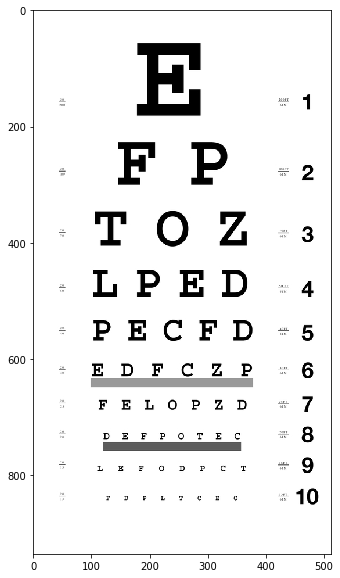

This image has 936 pixels in height and 513 pixels in width.


In [12]:
# Import the needed libreries
import numpy as np
import cv2
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [20, 10]

# Getting the image
img = cv2.imread('vision_test.jpg')
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)   # Get the gray-scale-image

# Plotting image
plt.imshow(gray_img, cmap = 'gray')
plt.show()

# Getting dimensions
dimensions = gray_img.shape
print("This image has " + str(dimensions[0]) + " pixels in height and " + str(dimensions[1]) + " pixels in width.")


In [13]:
# Padding. Replication criteria
pad_img = cv2.copyMakeBorder(gray_img, 1, 1, 1, 1, cv2.BORDER_REPLICATE)

# Getting dimensions
pad_dimensions = pad_img.shape
print("This image has " + str(pad_dimensions[0]) + " pixels in height and " + str(pad_dimensions[1]) + " pixels in width.")

This image has 938 pixels in height and 515 pixels in width.


In [14]:
# Preparing the outcome image
outcome_img = np.zeros((dimensions[0], dimensions[1]), np.uint8)

# Setting the kernel
kernel_3_3 = np.matrix([[1/9, 1/9, 1/9],[1/9, 1/9, 1/9],[1/9, 1/9, 1/9]])
print('The kernel used is: \n')
print(kernel_3_3)

# Testing our pixel selection
x = 1
y = 1
square_image_test = pad_img[x-1:x+2, y-1:y+2]

print('\n\nThe section under filter is: \n')
print(square_image_test)

The kernel used is: 

[[0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]]


The section under filter is: 

[[255 255 255]
 [255 255 255]
 [255 255 255]]


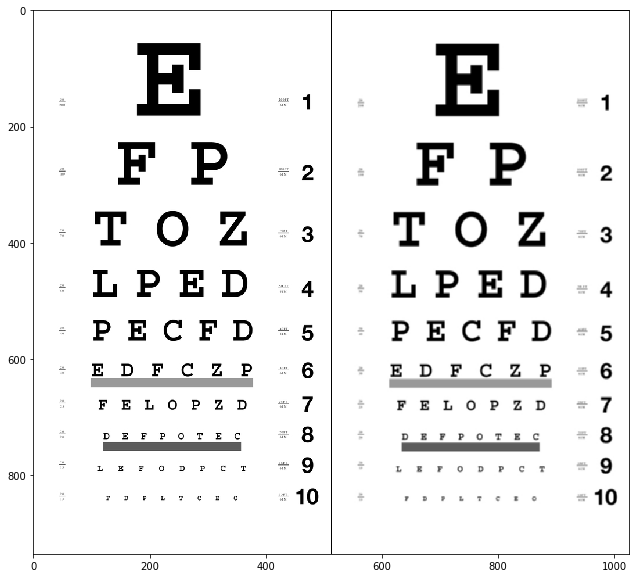

In [15]:
# Convolutional operation
for x in range(1, dimensions[0]):
    for y in range(1, dimensions[1]):
        square_image = pad_img[x-1:x+2, y-1:y+2]
        pixel_value = np.sum(np.multiply(kernel_3_3, square_image))
        outcome_img[x, y] = pixel_value

# Plotting image
plt.imshow(cv2.hconcat([gray_img, outcome_img]), cmap = 'gray')
plt.show()

#### Now. Change the kernel size (e.g. $9 \times 9$)

In [16]:
# Padding. Replication criteria
pad_img_9_9 = cv2.copyMakeBorder(gray_img, 4, 4, 4, 4, cv2.BORDER_REPLICATE)

# Setting the kernel
kernel_9_9 = np.matrix([[1/81, 1/81, 1/81, 1/81, 1/81, 1/81, 1/81, 1/81, 1/81], \
                        [1/81, 1/81, 1/81, 1/81, 1/81, 1/81, 1/81, 1/81, 1/81], \
                        [1/81, 1/81, 1/81, 1/81, 1/81, 1/81, 1/81, 1/81, 1/81], \
                        [1/81, 1/81, 1/81, 1/81, 1/81, 1/81, 1/81, 1/81, 1/81], \
                        [1/81, 1/81, 1/81, 1/81, 1/81, 1/81, 1/81, 1/81, 1/81], \
                        [1/81, 1/81, 1/81, 1/81, 1/81, 1/81, 1/81, 1/81, 1/81], \
                        [1/81, 1/81, 1/81, 1/81, 1/81, 1/81, 1/81, 1/81, 1/81], \
                        [1/81, 1/81, 1/81, 1/81, 1/81, 1/81, 1/81, 1/81, 1/81], \
                        [1/81, 1/81, 1/81, 1/81, 1/81, 1/81, 1/81, 1/81, 1/81]])
print('The kernel used is: \n')
print(kernel_9_9)

# Testing our pixel selection
x = 4
y = 4
square_image_test_9_9 = pad_img_9_9[x-4:x+5, y-4:y+5]

print('\n\nThe section under filter is: \n')
print(square_image_test_9_9)

The kernel used is: 

[[0.01234568 0.01234568 0.01234568 0.01234568 0.01234568 0.01234568
  0.01234568 0.01234568 0.01234568]
 [0.01234568 0.01234568 0.01234568 0.01234568 0.01234568 0.01234568
  0.01234568 0.01234568 0.01234568]
 [0.01234568 0.01234568 0.01234568 0.01234568 0.01234568 0.01234568
  0.01234568 0.01234568 0.01234568]
 [0.01234568 0.01234568 0.01234568 0.01234568 0.01234568 0.01234568
  0.01234568 0.01234568 0.01234568]
 [0.01234568 0.01234568 0.01234568 0.01234568 0.01234568 0.01234568
  0.01234568 0.01234568 0.01234568]
 [0.01234568 0.01234568 0.01234568 0.01234568 0.01234568 0.01234568
  0.01234568 0.01234568 0.01234568]
 [0.01234568 0.01234568 0.01234568 0.01234568 0.01234568 0.01234568
  0.01234568 0.01234568 0.01234568]
 [0.01234568 0.01234568 0.01234568 0.01234568 0.01234568 0.01234568
  0.01234568 0.01234568 0.01234568]
 [0.01234568 0.01234568 0.01234568 0.01234568 0.01234568 0.01234568
  0.01234568 0.01234568 0.01234568]]


The section under filter is: 

[[255 25

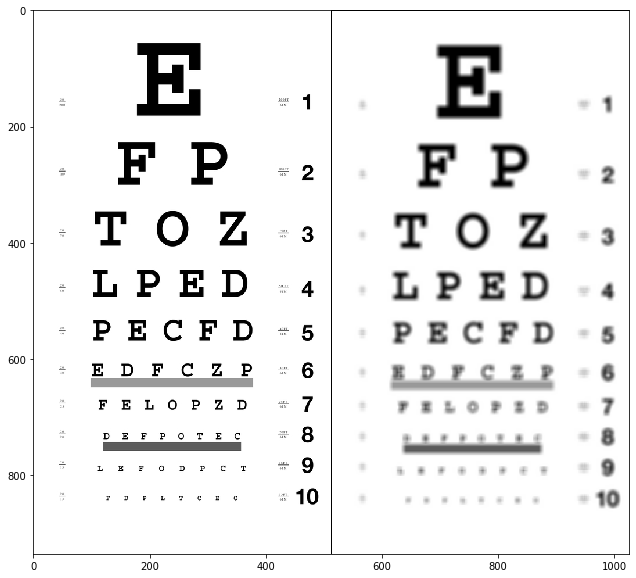

In [18]:
# Convolutional operation
for x in range(4, dimensions[0]):
    for y in range(4, dimensions[1]):
        square_image = pad_img_9_9[x-4:x+5, y-4:y+5]
        pixel_value = np.sum(np.multiply(kernel_9_9, square_image))
        outcome_img[x, y] = pixel_value

# Plotting image
plt.imshow(cv2.hconcat([gray_img, outcome_img]), cmap = 'gray')
plt.show()

The filters also aid to remove noise. There are many kind of noises, the most common for image processing are:
- Salt & pepper noise (Impulse)
- Gausian noise

### Salt & pepper noise
It is produced when the image is affected by intense and quick perturbations or impulses. It consist in black or white pixels through the image in a random way.

#### Let's repair a salty & peppered image applying a mean filter


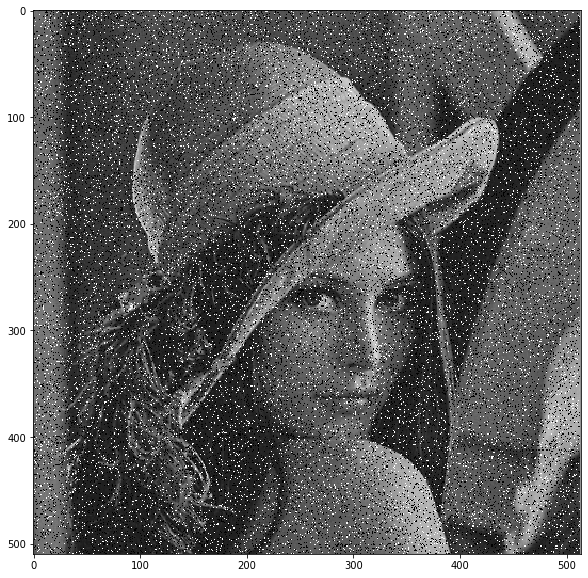

In [19]:
# Getting the image
img = cv2.imread('lena_salt_and_pepper.png')
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)   # Get the gray-scale-image

# Plotting image
plt.imshow(gray_img, cmap = 'gray')
plt.show()

# Getting dimensions
dimensions = gray_img.shape

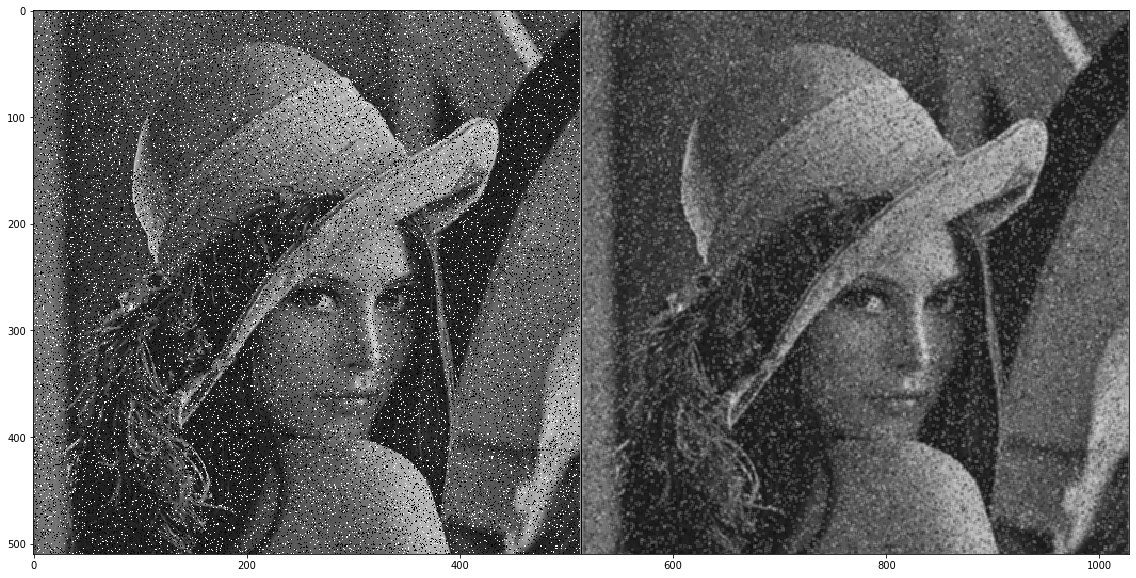

In [20]:
# Padding. Replication criteria
pad_img = cv2.copyMakeBorder(gray_img, 1, 1, 1, 1, cv2.BORDER_REPLICATE)

# Preparing the outcome image
outcome_img = np.zeros((dimensions[0], dimensions[1]), np.uint8)

# Setting the kernel
kernel_3_3 = np.matrix([[1/9, 1/9, 1/9],[1/9, 1/9, 1/9],[1/9, 1/9, 1/9]])

# Convolutional operation
for x in range(1, dimensions[0]):
    for y in range(1, dimensions[1]):
        square_image = pad_img[x-1:x+2, y-1:y+2]
        pixel_value = np.sum(np.multiply(kernel_3_3, square_image))
        outcome_img[x, y] = pixel_value

# Plotting image
plt.imshow(cv2.hconcat([gray_img, outcome_img]), cmap = 'gray')
plt.show()